# EDA

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
project_path = os.path.abspath(os.path.join('../../'))
sys.path.append(project_path)

In [ ]:
from src.etl.extract.data_extract_strategy import DataLoader

csv_config = {
    "type": "csv",
    "path": os.path.join(project_path, "data","raw", "source_clovis_vieira_news_sentiment_analysis", "data.csv"),
    }
loader_csv = DataLoader.get_loader(cfg=csv_config)
df = loader_csv.load()
df.head()

,Source,Author,Title,Description,URL,Published At,Sentiment,Type
0,stgnews,Bridger Palmer,Pine View High teacher wins Best in State awar...,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business
1,Zimbabwe Mail,Staff Reporter,Businesses Face Financial Strain Amid Liquidit...,"Harare, Zimbabwe – Local businesses are grappl...",https://www.thezimbabwemail.com/business/busin...,2024-07-12T22:59:42+00:00,neutral,Business
2,4-traders,NaN,Musk donates to super pac working to elect Tru...,(marketscreener.com) Billionaire Elon Musk has...,https://www.marketscreener.com/business-leader...,2024-07-12T22:52:55+00:00,positive,Business
3,4-traders,NaN,US FTC issues warning to franchisors over unfa...,(marketscreener.com) A U.S. trade regulator on...,https://www.marketscreener.com/quote/stock/MCD...,2024-07-12T22:41:01+00:00,negative,Business
4,PLANET,NaN,Rooftop solar's dark side,4.5 million households in the U.S. have solar ...,https://www.npr.org/2024/07/12/1197961036/roof...,2024-07-12T22:28:19+00:00,positive,Business


In [3]:
import src.etl.transform.data_cleansing_strategy as BaseCleansing

strategies = [
        BaseCleansing.DropColumnsCleansing(columns=['Source','Author','Sentiment', 'URL']),
        BaseCleansing.DropDuplicateKeepFirstCleansing(),
        BaseCleansing.SpaceCleansing(columns=['Title', 'Description']),
        BaseCleansing.ReplaceForCleansing(columns=['Title', 'Description'], to_replace=[""," "], to_replace_with=np.nan),
        BaseCleansing.DropNaCleansing(['Title', 'Description']),
        BaseCleansing.LowerCaseCleansing(columns=['Title', 'Description','Type','Source','Author']),
        ]
cleansing = BaseCleansing.DataCleansing(strategies)
df = cleansing.clean(df)
df.head()


Dropping columns: ['Source', 'Author', 'Sentiment', 'URL']
----------------------------------------
No columns specified, dropping duplicates based on all columns.
----------------------------------------
Stripping spaces from column: Title
Stripping spaces from column: Description
----------------------------------------
Replacing ['', ' '] with nan in column: Title
Replacing ['', ' '] with nan in column: Description
----------------------------------------
Dropping rows with empty or NaN in '['Title', 'Description']'
----------------------------------------
Converting values in column 'Title' to lowercase.
Converting values in column 'Description' to lowercase.
Converting values in column 'Type' to lowercase.
Column 'Source' not found in DataFrame, skipping.
Column 'Author' not found in DataFrame, skipping.
----------------------------------------


,Title,Description,Published At,Type
0,pine view high teacher wins best in state awar...,"st. george — kaitlyn larson, a first-year teac...",2024-07-12T23:45:25+00:00,business
1,businesses face financial strain amid liquidit...,"harare, zimbabwe – local businesses are grappl...",2024-07-12T22:59:42+00:00,business
2,musk donates to super pac working to elect tru...,(marketscreener.com) billionaire elon musk has...,2024-07-12T22:52:55+00:00,business
3,us ftc issues warning to franchisors over unfa...,(marketscreener.com) a u.s. trade regulator on...,2024-07-12T22:41:01+00:00,business
4,rooftop solar's dark side,4.5 million households in the u.s. have solar ...,2024-07-12T22:28:19+00:00,business


In [4]:
import src.etl.transform.data_transform_strategy as BaseTransform
maps = {
        'Title': 'str',
        'Description': 'str',
        'Published At': 'datetime64[ns, UTC]',
        'Source': 'str',
        'Author': 'str',
        'Type':'category'
    }
rename_map = {
        'Title': 'title',
        'Description': 'description',
        'Published At': 'published_time',
        'Source': 'source',
        'Author': 'author',
        'Type': 'categories'
    }
strategies = [
        BaseTransform.AstypeTransform(dtype_map=maps),
        BaseTransform.RenameColumnsTransform(rename_map=rename_map),
    ]
transform = BaseTransform.DataTransform(strategies)
df= transform.transform(df)
df.head()


Changing column 'Title' to str ...
Changing column 'Description' to str ...
Changing column 'Published At' to datetime64[ns, UTC] ...
Column 'Source' not found in DataFrame. Skipping.
Column 'Author' not found in DataFrame. Skipping.
Changing column 'Type' to category ...
----------------------------------------
Renaming columns: {'Title': 'title', 'Description': 'description', 'Published At': 'published_time', 'Source': 'source', 'Author': 'author', 'Type': 'categories'}
----------------------------------------


,title,description,published_time,categories
0,pine view high teacher wins best in state awar...,"st. george — kaitlyn larson, a first-year teac...",2024-07-12 23:45:25+00:00,business
1,businesses face financial strain amid liquidit...,"harare, zimbabwe – local businesses are grappl...",2024-07-12 22:59:42+00:00,business
2,musk donates to super pac working to elect tru...,(marketscreener.com) billionaire elon musk has...,2024-07-12 22:52:55+00:00,business
3,us ftc issues warning to franchisors over unfa...,(marketscreener.com) a u.s. trade regulator on...,2024-07-12 22:41:01+00:00,business
4,rooftop solar's dark side,4.5 million households in the u.s. have solar ...,2024-07-12 22:28:19+00:00,business


In [5]:
import src.etl.transform.data_encoding_strategy as BaseEncoder
mapping = {'business': 0, 'entertainment': 1, 'general': 2, 'health': 3, 'politics': 4, 'science': 5, 'sports': 6, 'technology': 7}
strategies = [
        BaseEncoder.LabelColumnsEncoder(columns=['categories']),
        #BaseEncoder.CustomMapEncoder(columns=['categories'], mapping=mapping)
    ]
encoder = BaseEncoder.DataEncoder(strategies)
df = encoder.encode(df)
df.head()

Mapping for categories: {'business': 0, 'entertainment': 1, 'general': 2, 'health': 3, 'science': 4, 'sports': 5, 'technology': 6}
----------------------------------------


,title,description,published_time,categories,encoded_categories
0,pine view high teacher wins best in state awar...,"st. george — kaitlyn larson, a first-year teac...",2024-07-12 23:45:25+00:00,business,0
1,businesses face financial strain amid liquidit...,"harare, zimbabwe – local businesses are grappl...",2024-07-12 22:59:42+00:00,business,0
2,musk donates to super pac working to elect tru...,(marketscreener.com) billionaire elon musk has...,2024-07-12 22:52:55+00:00,business,0
3,us ftc issues warning to franchisors over unfa...,(marketscreener.com) a u.s. trade regulator on...,2024-07-12 22:41:01+00:00,business,0
4,rooftop solar's dark side,4.5 million households in the u.s. have solar ...,2024-07-12 22:28:19+00:00,business,0


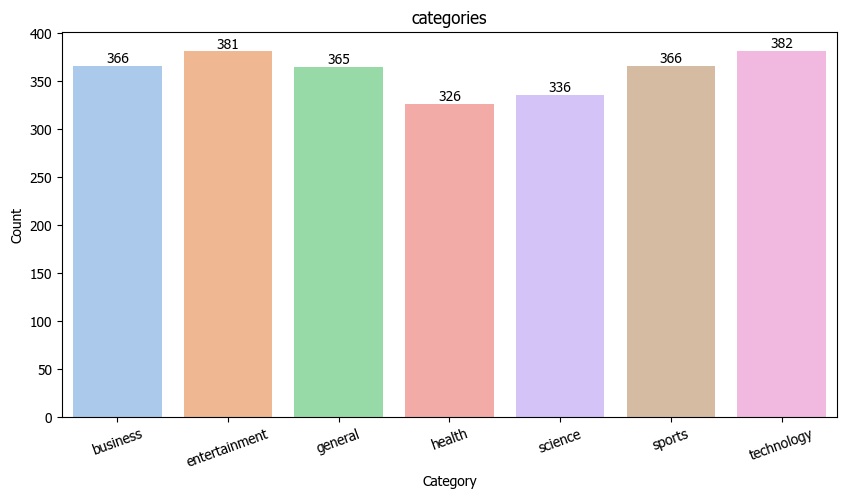

----------------------------------------


In [6]:
import src.analysis.visualization.data_univariate_visualization_strategy as BaseViz
strategies = [
    BaseViz.BarplotUniViz(
        sns_kwargs={"palette": "pastel", "hue": "category", "legend": False},
        plt_kwargs={"figsize": (10, 5), "title": 'categories', "rotation": 20, "fontsize":10}
        )
]
viz = BaseViz.UniVisualizer(strategies)
viz.visualize(df,'categories')